In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.shape

(500, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [8]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
Age,500.0,46.0,8.0,20.0,41.0,46.0,52.0,70.0
Annual Salary,500.0,62127.0,11703.0,20000.0,54392.0,62915.0,70118.0,100000.0
Credit Card Debt,500.0,9608.0,3489.0,100.0,7398.0,9655.0,11799.0,20000.0
Net Worth,500.0,431476.0,173537.0,20000.0,299824.0,426750.0,557324.0,1000000.0
Car Purchase Amount,500.0,44210.0,10773.0,9000.0,37630.0,43998.0,51255.0,80000.0


In [9]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

<AxesSubplot:>

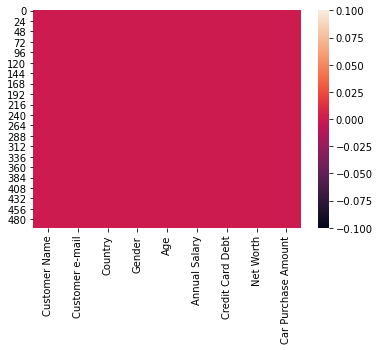

In [10]:
sns.heatmap(df.isna())

In [11]:
df['Customer Name'].value_counts()

Seth                   2
Walter                 2
Cleo Moore             1
Elliott Horne          1
Patrick, Merritt L.    1
                      ..
Vaughan                1
Thompson, Alvin R.     1
Hedley Greene          1
Rowan Kidd             1
Rhonda                 1
Name: Customer Name, Length: 498, dtype: int64

<BarContainer object of 10 artists>

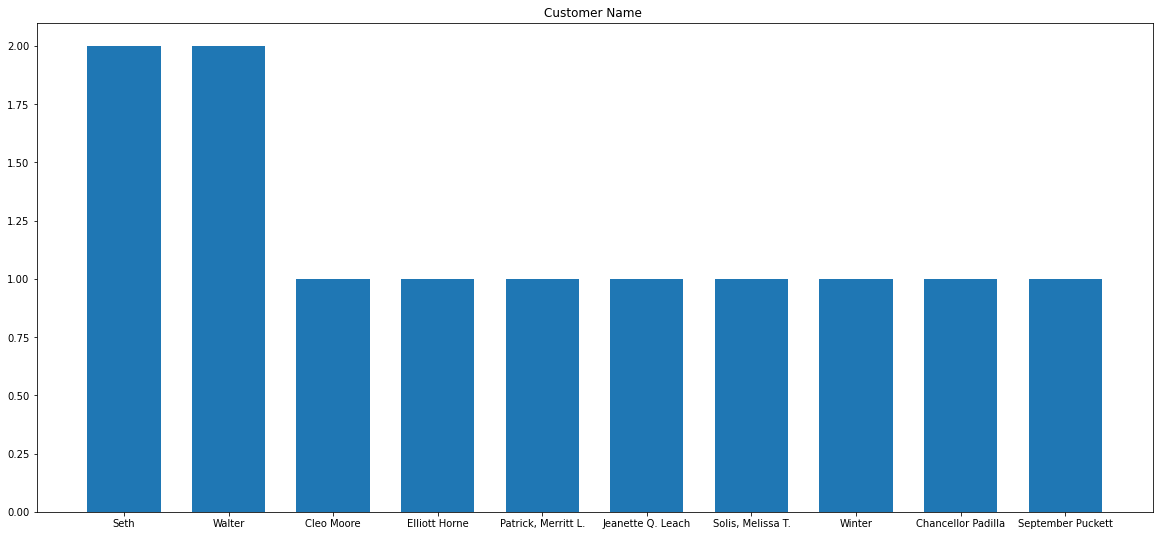

In [12]:
name=df['Customer Name'].value_counts().index[:10]
value=df['Customer Name'].value_counts().values[:10]
plt.figure(figsize=(20,9))
plt.title('Customer Name ')
plt.bar(name,value,width=0.7)

In [13]:
df['Gender'].value_counts()

1    253
0    247
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

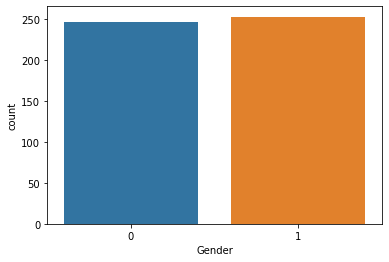

In [14]:
sns.countplot(data=df,x='Gender')

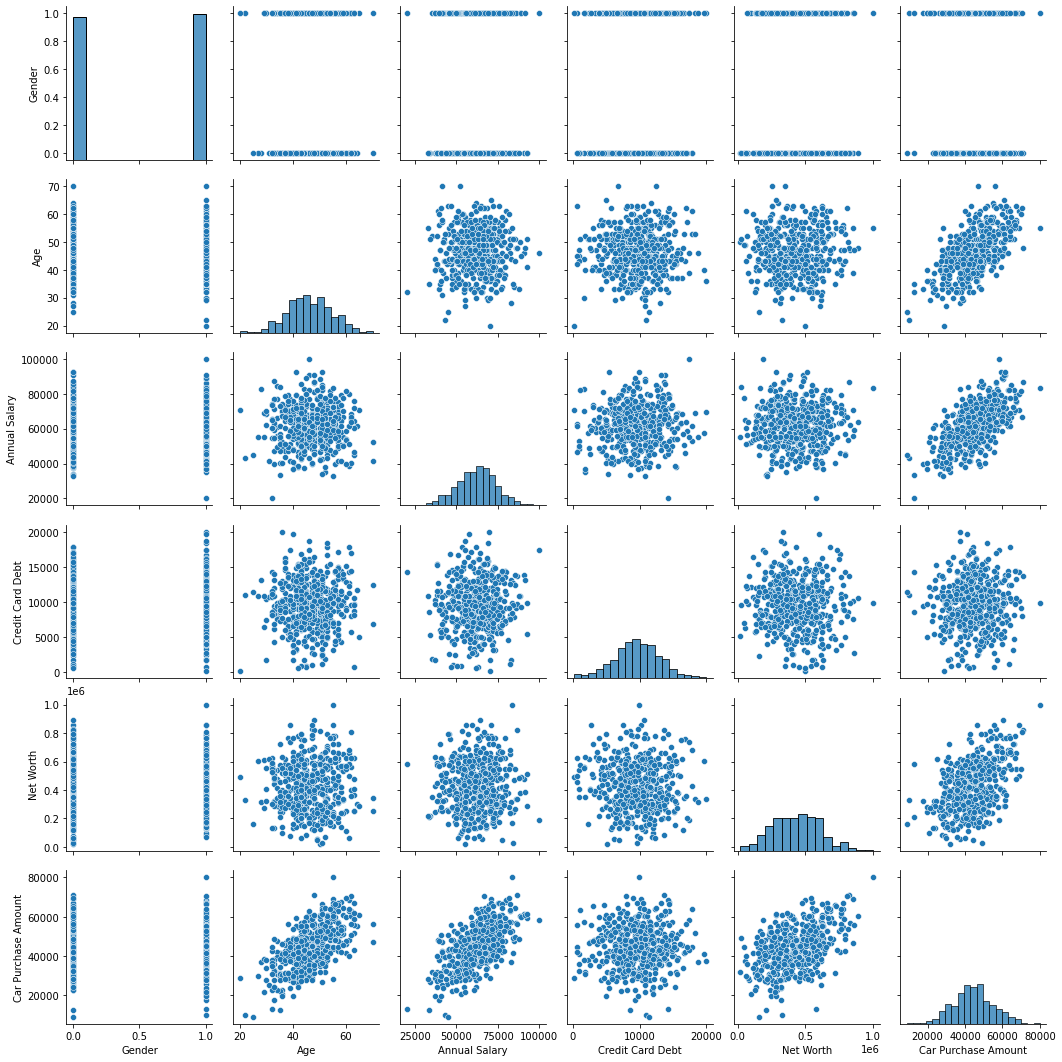

In [15]:
sns.pairplot(df)

In [16]:
cor=df.corr()

<AxesSubplot:>

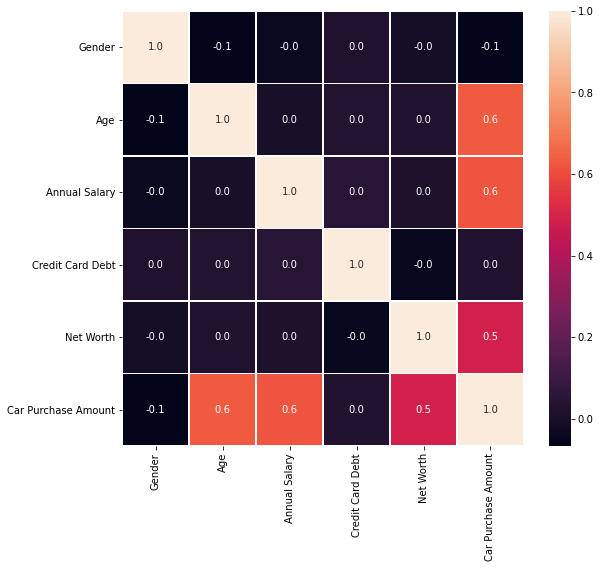

In [17]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f',linewidths=.5)

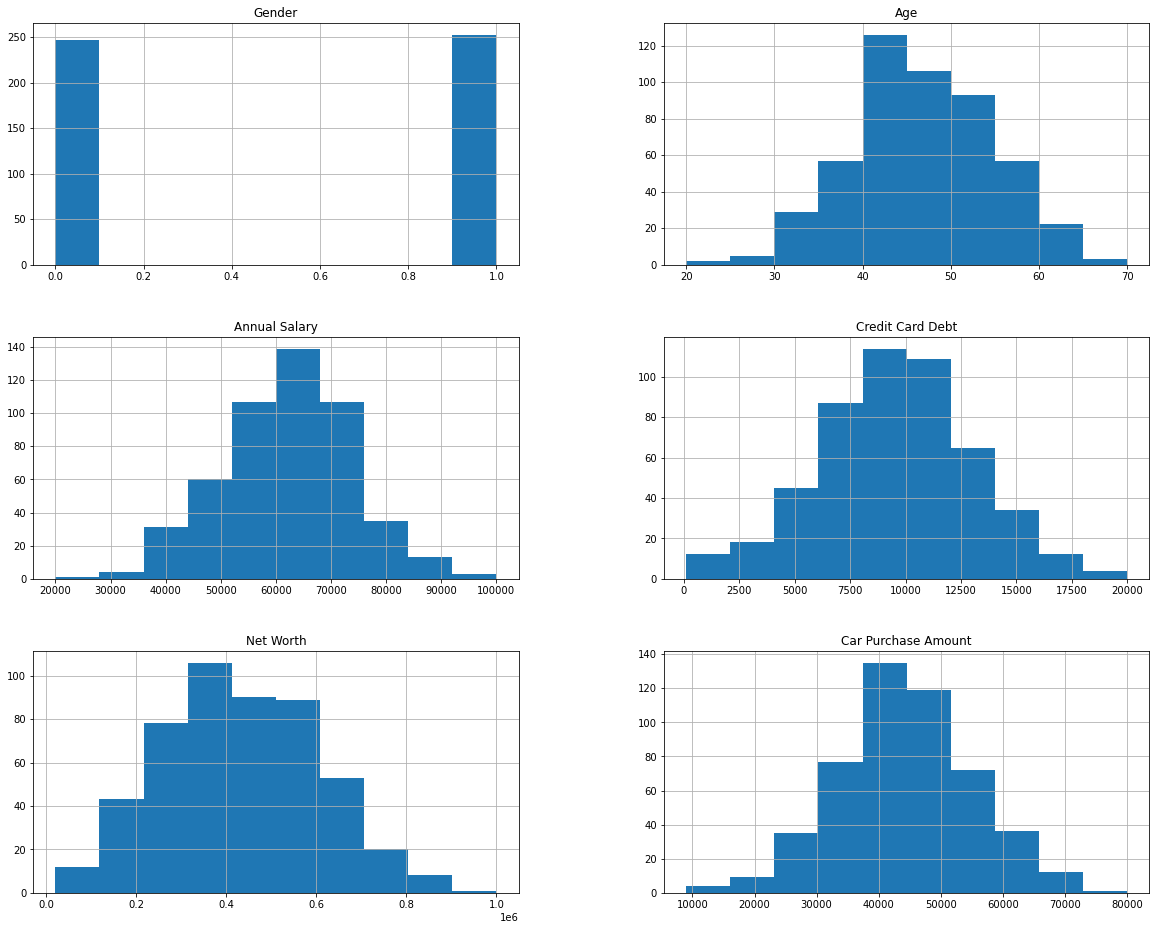

In [18]:
df.hist(figsize=(20,16))
plt.show()

In [19]:
df.drop(['Customer Name','Customer e-mail','Country'],axis=1,inplace=True)

In [20]:
df.duplicated().sum()

0

# Model

In [21]:
X=df.drop("Car Purchase Amount",axis=1)
y=df['Car Purchase Amount']

In [22]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,42,62812.09301,11609.380910,238961.2505
1,0,41,66646.89292,9572.957136,530973.9078
2,1,43,53798.55112,11160.355060,638467.1773
3,1,58,79370.03798,14426.164850,548599.0524
4,1,57,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016
496,1,38,56039.49793,12301.456790,360419.0988
497,1,54,68888.77805,10611.606860,764531.3203
498,1,59,49811.99062,14013.034510,337826.6382


In [23]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((335, 5), (165, 5), (335,), (165,))

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
mi=MinMaxScaler()

In [29]:
mi.fit_transform(X_train,y_train)

array([[0.        , 0.48      , 0.56705079, 0.3889153 , 0.56758118],
       [0.        , 0.16      , 0.78553167, 0.65337478, 0.29614571],
       [1.        , 0.6       , 0.39690293, 0.54701993, 0.61867781],
       ...,
       [0.        , 0.5       , 0.54451307, 0.18241808, 0.59677417],
       [1.        , 0.76      , 0.26761617, 0.40760507, 0.40471729],
       [1.        , 0.2       , 0.60361478, 0.36471292, 0.38737188]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
pre=model.predict(X_test)
pre

array([46001.50080421, 45213.71639652, 62978.14462678, 31628.27898069,
       60018.1406912 , 63048.13616925, 52217.59512509, 54525.40739488,
       52396.32903434, 48252.17268242, 37974.72832851, 56172.80162849,
       44674.18333996, 39299.78067217, 40170.63262481, 55253.92452374,
       48492.67717115, 17251.158222  , 60909.30183421, 50006.96496179,
       41606.56619941, 52652.62781101, 51783.68257958, 38485.70246669,
       41125.6889094 , 38686.95780078, 64178.60850018, 47931.82194649,
       23089.40655737, 52488.40656455, 54899.55987774, 46108.07120266,
       41546.27106947, 57335.08623296, 42829.76752636, 39627.30738569,
       61901.01975589, 30743.92926231, 41866.09484085, 39994.31270772,
       57251.14446116, 61038.02204627, 47052.69015579, 36379.63191779,
       53073.12413299, 44831.26727777, 35483.9065188 , 42156.34366325,
       52135.57709198, 47642.95717062, 41990.74791927, 32711.83305081,
       38260.64705195, 41541.39086628, 44824.37794232, 47931.17094162,
      

In [36]:
y_test.values

array([46082.80993, 45058.8969 , 63079.84329, 31837.22537, 60461.24268,
       63140.05082, 52477.83479, 54755.42038, 52707.96816, 47869.82593,
       38189.50601, 56229.4127 , 44361.87507, 39002.0771 , 39975.43302,
       55174.98946, 48901.44342, 17584.56963, 60526.97788, 49991.60697,
       41352.47071, 52785.16947, 51730.17434, 38042.80065, 41357.17897,
       38243.06228, 64147.28888, 47984.42062, 22681.71667, 52240.72866,
       55167.37361, 45857.75365, 41147.46679, 57430.76903, 42925.70921,
       39888.59789, 61731.71426, 30841.00154, 42209.28948, 40093.61981,
       57303.87131, 60670.33672, 47443.74443, 36638.20688, 53489.46214,
       44434.71917, 35321.45877, 42288.81046, 52056.41478, 47240.86004,
       41903.65171, 32608.45468, 38243.66481, 41769.38288, 45208.42539,
       48100.29052, 60222.22672, 44633.99241, 44525.02085, 38502.42392,
       64188.26862, 43598.96993, 22630.25982, 55377.87697, 41221.24918,
       54823.19221, 59984.16361, 34215.7615 , 42997.16761, 47970

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(pre,y_test)

0.9994073586684703